## NLTK Module practise

In [5]:
import nltk
from nltk.corpus import brown

In [2]:
brown.words()

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

In [3]:
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [5]:
review_words = brown.words(categories="reviews")
len(review_words)

40704

#### Filtering stopwords

In [4]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize, sent_tokenize


In [2]:
my_sent = "Hello world! Isn't it a beautiful day in town"
stop_words = set(stopwords.words('english'))
word_tokens = word_tokenize(my_sent)

filtered_sent1 = [w for w in word_tokens if not w in stop_words]
filtered_sent2 = []

for w in word_tokens:
    if w not in stop_words:
        filtered_sent2.append(w)
        
print(filtered_sent1)
print(filtered_sent2)

['Hello', 'world', '!', 'Is', "n't", 'beautiful', 'day', 'town']
['Hello', 'world', '!', 'Is', "n't", 'beautiful', 'day', 'town']


#### Lemmatization

In [3]:
from nltk.stem import WordNetLemmatizer 

lemmatizer = WordNetLemmatizer() 

print(lemmatizer.lemmatize("feet"))
print(lemmatizer.lemmatize("cacti"))
print(lemmatizer.lemmatize("geese"))
# Without a POS tag, lemmatizer asssumes everything is a noun
print(lemmatizer.lemmatize("loving"))
print(lemmatizer.lemmatize("loving", "v")) 

foot
cactus
goose
loving
love


#### POS tagging
Part-Of-Speech tagging marks words in the corpus to a corresponding part of speech tagbased in its context and definition

In [6]:
stop_words = set(stopwords.words('english'))
txt = """ 
Text mining also referred to as text data mining, roughly equivalent to text analytics, is the process of deriving high-quality information fromtext. High-quality information os typically derived through the devising of pattern trends through means such as statistical pattern learning.
"""

tokenized = sent_tokenize(txt)
for i in tokenized:
    wordList = word_tokenize(i)
    wordList = [w for w in wordList if not w in stop_words]
    tagged = nltk.pos_tag(wordList)
print(tagged)

[('High-quality', 'NNP'), ('information', 'NN'), ('os', 'NN'), ('typically', 'RB'), ('derived', 'VBD'), ('devising', 'VBG'), ('pattern', 'NN'), ('trends', 'NNS'), ('means', 'VBZ'), ('statistical', 'JJ'), ('pattern', 'NN'), ('learning', 'NN'), ('.', '.')]


#### Named Entity Recognition
NER seeks to identify real-world entity from the text and sort it into predefined categoris such as the names of people, places, organizations, etc

In [7]:
doc = """ 
Google is an American multinatinal technology company that specializes in related services and products, which include online advertising technologies search engine, clod computing, and hardware, it was founded in 1998 by Larry Page and Sergey  Brin while they were Ph.D students at Stanford University in California
"""
# tokenize doc 
tokenized_doc = word_tokenize(doc)
tagged_words =nltk.pos_tag(tokenized_doc)
ne_chunked_sents = nltk.ne_chunk(tagged_words)
# Exctract all named entities 
named_entities = []
for tagged_tree in ne_chunked_sents:
    if hasattr(tagged_tree, 'label'):
        entity_name = ''.join(c[0] for c in tagged_tree.leaves())
        entity_type = tagged_tree.label() 
        named_entities.append((entity_name, entity_type))
print(named_entities)
        
        

[('Google', 'GPE'), ('American', 'GPE'), ('LarryPage', 'PERSON'), ('SergeyBrin', 'PERSON'), ('StanfordUniversity', 'ORGANIZATION'), ('California', 'GPE')]


### DEMO: Brown Corpus

In [10]:
import nltk

In [11]:
with open('brown_copus.txt', 'r') as myfile:
    data = myfile.read().replace('\n', '') 

In [22]:
data2 = data.replace('/', '')
data2.replace("\\", "")

'The Fulton County Grand Jury said Friday an investigation of Atlanta\'s recent primary election produced "no evidence" that any irregularities took place.   The jury further said in term-end presentments that the City Executive Committee, which had over-all charge of the election, "deserves the praise and thanks of the City of Atlanta" for the manner in which the election was conducted.The September-October term jury had been charged by Fulton Superior Court Judge Durwood Pye to investigate reports of possible "irregularities" in the hard-fought primary which was won by Mayor-nominate Ivan Allen Jr&.   "Only a relative handful of such reports was received", the jury said, "considering the widespread interest in the election, the number of voters and the size of this city".   The jury said it did find that many of Georgia\'s registration and election laws "are outmoded or inadequate and often ambiguous".   It recommended that Fulton legislators act "to have these laws studied and revis

In [18]:
for i, line in enumerate(data2.split('\n')):
    if i > 10:
        break
    print(str(i) + ':\t' + line)

0:	The Fulton County Grand Jury said Friday an investigation of Atlanta's recent primary election produced "no evidence" that any irregularities took place.   The jury further said in term-end presentments that the City Executive Committee, which had over-all charge of the election, "deserves the praise and thanks of the City of Atlanta" for the manner in which the election was conducted.The September-October term jury had been charged by Fulton Superior Court Judge Durwood Pye to investigate reports of possible "irregularities" in the hard-fought primary which was won by Mayor-nominate Ivan Allen Jr&.   "Only a relative handful of such reports was received", the jury said, "considering the widespread interest in the election, the number of voters and the size of this city".   The jury said it did find that many of Georgia's registration and election laws "are outmoded or inadequate and often ambiguous".   It recommended that Fulton legislators act "to have these laws studied and revis

In [19]:
# Tokenization
from nltk import sent_tokenize, word_tokenize

In [23]:
sent_tokenize(data2)

['The Fulton County Grand Jury said Friday an investigation of Atlanta\'s recent primary election produced "no evidence" that any irregularities took place.',
 'The jury further said in term-end presentments that the City Executive Committee, which had over-all charge of the election, "deserves the praise and thanks of the City of Atlanta" for the manner in which the election was conducted.The September-October term jury had been charged by Fulton Superior Court Judge Durwood Pye to investigate reports of possible "irregularities" in the hard-fought primary which was won by Mayor-nominate Ivan Allen Jr&.',
 '"Only a relative handful of such reports was received", the jury said, "considering the widespread interest in the election, the number of voters and the size of this city".',
 'The jury said it did find that many of Georgia\'s registration and election laws "are outmoded or inadequate and often ambiguous".',
 'It recommended that Fulton legislators act "to have these laws studied 

In [24]:
from nltk.corpus import stopwords 

for sent in sent_tokenize(data2):
    print(word_tokenize(sent))

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', 'Atlanta', "'s", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.']
['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted.The', 'September-October', 'term', 'jury', 'had', 'been', 'charged', 'by', 'Fulton', 'Superior', 'Court', 'Judge', 'Durwood', 'Pye', 'to', 'investigate', 'reports', 'of', 'possible', '``', 'irregularities', "''", 'in', 'the', 'hard-fought', 'primary', 'which', 'was', 'won', 'by', 'Mayor-nominate', 'Ivan', 'Allen', 'Jr', '&', '.']
['``', 'Only', 'a', 'relative', 'handful', 'of', 'such', 'reports'

In [27]:
# Stop Word Removal
from nltk.corpus import stopwords

In [29]:
stopwords_en = stopwords.words('english')
single_tokenized_lowered = list(map(str.lower, word_tokenize(data2)))
print(single_tokenized_lowered)

['the', 'fulton', 'county', 'grand', 'jury', 'said', 'friday', 'an', 'investigation', 'of', 'atlanta', "'s", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.', 'the', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'city', 'executive', 'committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'city', 'of', 'atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted.the', 'september-october', 'term', 'jury', 'had', 'been', 'charged', 'by', 'fulton', 'superior', 'court', 'judge', 'durwood', 'pye', 'to', 'investigate', 'reports', 'of', 'possible', '``', 'irregularities', "''", 'in', 'the', 'hard-fought', 'primary', 'which', 'was', 'won', 'by', 'mayor-nominate', 'ivan', 'allen', 'jr', '&', '.', '``', 'only', 'a', 'relative', 'handful', 'of', 'such', 'reports', 

In [31]:
stopwords_en = set(stopwords.words('english'))
print([word for word in single_tokenized_lowered if word not in stopwords_en])

['fulton', 'county', 'grand', 'jury', 'said', 'friday', 'investigation', 'atlanta', "'s", 'recent', 'primary', 'election', 'produced', '``', 'evidence', "''", 'irregularities', 'took', 'place', '.', 'jury', 'said', 'term-end', 'presentments', 'city', 'executive', 'committee', ',', 'over-all', 'charge', 'election', ',', '``', 'deserves', 'praise', 'thanks', 'city', 'atlanta', "''", 'manner', 'election', 'conducted.the', 'september-october', 'term', 'jury', 'charged', 'fulton', 'superior', 'court', 'judge', 'durwood', 'pye', 'investigate', 'reports', 'possible', '``', 'irregularities', "''", 'hard-fought', 'primary', 'mayor-nominate', 'ivan', 'allen', 'jr', '&', '.', '``', 'relative', 'handful', 'reports', 'received', "''", ',', 'jury', 'said', ',', '``', 'considering', 'widespread', 'interest', 'election', ',', 'number', 'voters', 'size', 'city', "''", '.', 'jury', 'said', 'find', 'many', 'georgia', "'s", 'registration', 'election', 'laws', '``', 'outmoded', 'inadequate', 'often', 'ambi

In [32]:
# Removing punctuations
from string import punctuation 
print('From string.punctuation:', type(punctuation), punctuation)

From string.punctuation: <class 'str'> !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [33]:
stopwords_en_withpunct = stopwords_en.union(set(punctuation))

In [34]:
print(stopwords_en_withpunct)

{'did', ']', 'those', 'i', 'because', 'these', 'about', 'during', 'too', "should've", 'before', '(', 're', "you've", 'she', 'be', 'yours', 'at', 'no', ':', 'y', 'needn', "wasn't", "it's", 'has', '$', 't', 'again', "doesn't", "isn't", 'and', 'should', 'won', 'our', 'between', '_', ';', 'itself', 've', 'below', 'where', 'had', 'off', 'm', 'doesn', "didn't", 'hasn', 'most', 'when', 'an', '=', 'its', 'he', 'through', 'them', 'were', 'each', 'above', 'of', 'yourselves', 'why', "hasn't", 'didn', 'very', 'under', 'her', 'as', 'how', "couldn't", 'isn', '\\', 'wouldn', 'their', 'don', 'if', '>', 'than', 'was', "wouldn't", "mightn't", 'whom', '}', 'does', 'down', "weren't", 'doing', 'who', 'll', 'hadn', '{', 'in', "that'll", ')', 'own', 'haven', 'him', 'other', 'd', 'all', 'we', "haven't", '"', 'nor', '&', '/', '?', 'have', "you'll", '#', "you'd", "won't", 'against', 'having', 'ma', 'couldn', '~', 'they', 'from', 'any', 'can', 'further', 'here', 'o', 'my', '+', 'to', '%', 'yourself', 'mightn', '

In [35]:
print([word for word in single_tokenized_lowered if word not in stopwords_en_withpunct])

['fulton', 'county', 'grand', 'jury', 'said', 'friday', 'investigation', 'atlanta', "'s", 'recent', 'primary', 'election', 'produced', '``', 'evidence', "''", 'irregularities', 'took', 'place', 'jury', 'said', 'term-end', 'presentments', 'city', 'executive', 'committee', 'over-all', 'charge', 'election', '``', 'deserves', 'praise', 'thanks', 'city', 'atlanta', "''", 'manner', 'election', 'conducted.the', 'september-october', 'term', 'jury', 'charged', 'fulton', 'superior', 'court', 'judge', 'durwood', 'pye', 'investigate', 'reports', 'possible', '``', 'irregularities', "''", 'hard-fought', 'primary', 'mayor-nominate', 'ivan', 'allen', 'jr', '``', 'relative', 'handful', 'reports', 'received', "''", 'jury', 'said', '``', 'considering', 'widespread', 'interest', 'election', 'number', 'voters', 'size', 'city', "''", 'jury', 'said', 'find', 'many', 'georgia', "'s", 'registration', 'election', 'laws', '``', 'outmoded', 'inadequate', 'often', 'ambiguous', "''", 'recommended', 'fulton', 'legis

In [43]:
# Stemming and lemmatization
from nltk.stem import PorterStemmer 
porter = PorterStemmer() 

print([porter.stem(word) for word in single_tokenized_lowered])

['the', 'fulton', 'counti', 'grand', 'juri', 'said', 'friday', 'an', 'investig', 'of', 'atlanta', "'s", 'recent', 'primari', 'elect', 'produc', '``', 'no', 'evid', "''", 'that', 'ani', 'irregular', 'took', 'place', '.', 'the', 'juri', 'further', 'said', 'in', 'term-end', 'present', 'that', 'the', 'citi', 'execut', 'committe', ',', 'which', 'had', 'over-al', 'charg', 'of', 'the', 'elect', ',', '``', 'deserv', 'the', 'prais', 'and', 'thank', 'of', 'the', 'citi', 'of', 'atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'elect', 'wa', 'conducted.th', 'september-octob', 'term', 'juri', 'had', 'been', 'charg', 'by', 'fulton', 'superior', 'court', 'judg', 'durwood', 'pye', 'to', 'investig', 'report', 'of', 'possibl', '``', 'irregular', "''", 'in', 'the', 'hard-fought', 'primari', 'which', 'wa', 'won', 'by', 'mayor-nomin', 'ivan', 'allen', 'jr', '&', '.', '``', 'onli', 'a', 'rel', 'hand', 'of', 'such', 'report', 'wa', 'receiv', "''", ',', 'the', 'juri', 'said', ',', '``', 'consid',

In [40]:
from nltk.stem import WordNetLemmatizer 
wnl = WordNetLemmatizer() 

In [42]:
# for word in single_tokenized_lowered:
#     print(wnl.lemmatize(word))

print([wnl.lemmatize(word) for word in single_tokenized_lowered])

['the', 'fulton', 'county', 'grand', 'jury', 'said', 'friday', 'an', 'investigation', 'of', 'atlanta', "'s", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularity', 'took', 'place', '.', 'the', 'jury', 'further', 'said', 'in', 'term-end', 'presentment', 'that', 'the', 'city', 'executive', 'committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'city', 'of', 'atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'wa', 'conducted.the', 'september-october', 'term', 'jury', 'had', 'been', 'charged', 'by', 'fulton', 'superior', 'court', 'judge', 'durwood', 'pye', 'to', 'investigate', 'report', 'of', 'possible', '``', 'irregularity', "''", 'in', 'the', 'hard-fought', 'primary', 'which', 'wa', 'won', 'by', 'mayor-nominate', 'ivan', 'allen', 'jr', '&', '.', '``', 'only', 'a', 'relative', 'handful', 'of', 'such', 'report', 'wa', 're

In [49]:
# Adding POS tagging
stop_words = set(stopwords.words('english'))
tokenized = sent_tokenize(data2)
for i in tokenized:
    wordslist = nltk.word_tokenize(i)
    wordlist = [w for w in wordslist if w not in stop_words]
    tagged = nltk.pos_tag(wordlist)
    print(tagged)

[('The', 'DT'), ('Fulton', 'NNP'), ('County', 'NNP'), ('Grand', 'NNP'), ('Jury', 'NNP'), ('said', 'VBD'), ('Friday', 'NNP'), ('investigation', 'NN'), ('Atlanta', 'NNP'), ("'s", 'POS'), ('recent', 'JJ'), ('primary', 'JJ'), ('election', 'NN'), ('produced', 'VBD'), ('``', '``'), ('evidence', 'NN'), ("''", "''"), ('irregularities', 'NNS'), ('took', 'VBD'), ('place', 'NN'), ('.', '.')]
[('The', 'DT'), ('jury', 'NN'), ('said', 'VBD'), ('term-end', 'JJ'), ('presentments', 'NNS'), ('City', 'NNP'), ('Executive', 'NNP'), ('Committee', 'NNP'), (',', ','), ('over-all', 'JJ'), ('charge', 'NN'), ('election', 'NN'), (',', ','), ('``', '``'), ('deserves', 'VBZ'), ('praise', 'JJ'), ('thanks', 'NNS'), ('City', 'NNP'), ('Atlanta', 'NNP'), ("''", "''"), ('manner', 'NN'), ('election', 'NN'), ('conducted.The', 'VBZ'), ('September-October', 'NNP'), ('term', 'NN'), ('jury', 'NN'), ('charged', 'VBN'), ('Fulton', 'NNP'), ('Superior', 'NNP'), ('Court', 'NNP'), ('Judge', 'NNP'), ('Durwood', 'NNP'), ('Pye', 'NNP')

In [51]:
# Named Entity Recognition

sentences = nltk.sent_tokenize(data2)
tokenized_sentences = [nltk.word_tokenize(sentence) for sentence in sentences]
tagged_sentences = [nltk.pos_tag(sentence) for sentence in tokenized_sentences]
chunked_sentences = nltk.ne_chunk_sents(tagged_sentences, binary=True)
def extract_entity_names(t):
    entity_names = []
    if hasattr(t, 'label') and t.label:
        if t.label() == 'NE':
            entity_names.append(' '.join([child[0] for child in t]))
        else: 
            for child in t: 
                entity_names.extend(extract_entity_names(child))
    return entity_names 
entity_names = []
for tree in chunked_sentences:
    entity_names.extend(extract_entity_names(tree))
print(set(entity_names))

{'DANGER', 'MISSION TO', 'Masonic Order', 'Pottawatomie County', 'Brelin', 'Music Center Building Fund Committee', 'Stickney', 'Actually Johnny', 'Morgan Lloyd', 'Advisory Committee', 'Jack Kennedy', 'Johnny Weissmuller', 'Thomas Aquinas', 'Election', 'Manager Paul Richards', 'Pentagon', 'Danny Thomas', 'CONSTANT', 'Democratic National Committeeman Paul Ziffren', 'Lucy Brett Andrew', 'Stadium Nov', 'Bellows', 'Raphael', 'Tammany', 'Forgiveness', 'CHOLESTEROL AND', 'Assembly', 'Rex', 'Manzanola', 'Old Town Art', '_ST', 'Miss Nancy Harris', 'Library', 'Hempstead', 'Debate', 'Dalton', 'Chin', 'Elks', 'Jenkins', 'Henri', 'Rutherford', 'Don Taussig', 'West Pratt', 'Blanche St', 'Kedzie', 'Ambassador', 'Blaine Whipple', 'Warren Spahn', 'Aikin Jr', 'Santa Barbara', 'Jean Fardulli', 'Vienna', 'Holy Cross Hospital', 'Democratic', 'Armenian', 'Kings', 'Karen', 'Mekong River', 'Ernie Broglio', 'Hodges', 'Anne', 'Administrator Andrew', 'Viet Cong', 'Pal', 'Clinton', 'YOUNGER SON', 'Small', 'Kern',

## Structuring Sentences and CFG

#### Chunking and chunk parsing

In [6]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

In [5]:
sent = "The little mouse ate the fresh cheese"
sent_tokens = pos_tag(word_tokenize(sent)) 
sent_tokens

[('The', 'DT'),
 ('little', 'JJ'),
 ('mouse', 'NN'),
 ('ate', 'VB'),
 ('the', 'DT'),
 ('fresh', 'JJ'),
 ('cheese', 'NN')]

#### NP chunk and Parser
Creating grammar from a noun phrase
- you mention the tags uou want inyour chunk phrase within {}

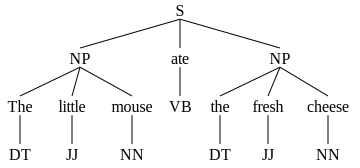

In [11]:
grammar_np = r"NP: {<DT>?<JJ>*<NN>}"

# Parsing the chunk
chunk_parser = nltk.RegexpParser(grammar_np)

chunk_result = chunk_parser.parse(sent_tokens)
chunk_result


#### VP Chunk and Parser

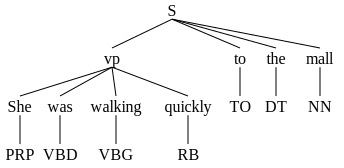

In [12]:
grammar_vp = r"vp: {<PRP>?<VB|VBD|VBZ|VBG>*<RB|RBR>?}"
chunk_parser2 = nltk.RegexpParser(grammar_vp)
sent2 = "She was walking quickly to the mall"
sent_tokens2 = nltk.pos_tag(word_tokenize(sent2))

chunk_result3 = chunk_parser2.parse(sent_tokens2)
chunk_result3

### Chinking
It is the process of removing a sequence of tokens from a chunk

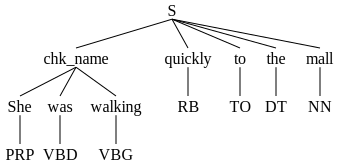

In [14]:
chink_grammar = r"""
chk_name: #chunk name
{<PRP>?<VB|VBD|VBZ|VBG>*<RB|RBR>?} # Chunk regex sequence
}<RB>+{ # Chink reegex sequence  - adverb
"""

# Creating parser
chink_parser = nltk.RegexpParser(chink_grammar)
chink_parser.parse(sent_tokens2)


### Implementing CFG

In [41]:
from nltk.parse.generate import generate
CFG_grammar = nltk.CFG.fromstring(
    """
    S -> NP VP
    VP -> V N 
    V -> "saw" | "met"
    NP -> "John" | "Jim"
    N -> "dog" | "cat"
    """
)
for sent in generate(CFG_grammar):
    print(" ".join(sent))
    


John saw dog
John saw cat
John met dog
John met cat
Jim saw dog
Jim saw cat
Jim met dog
Jim met cat


In [42]:
# Checking different rules
CFG_grammar.productions()

[S -> NP VP,
 VP -> V N,
 V -> 'saw',
 V -> 'met',
 NP -> 'John',
 NP -> 'Jim',
 N -> 'dog',
 N -> 'cat']

## DEMO: Tweet sentiment analysis

In [43]:
import os
path_gs = "C:\Program Files\gs\gs10.01.0\bin"
os.environ['PATH'] += os.pathsep + path_gs

In [45]:
import pandas as pd 
df = pd.read_csv('tweets.csv')
df = df[['text', 'sentiment']]

In [50]:
import re
r = re.compile(r"([@])(\w+)\b")

allReferences = map(lambda x: r.findall(x), str(df['text']))

import itertools
AllUniqueReferencesCombined = set(list(itertools.chain.from_iterable(allReferences)))
references = map(lambda x: x[0]+x[1], AllUniqueReferencesCombined)

file = open("references.txt", "a")
for each in references:
    file.write(each + "\n")
file.close

<function TextIOWrapper.close()>

In [53]:
import nltk 
def GetNounPhrases(s):
    try:
        sentences = nltk.sent_tokenize(s)
        sentences = [nltk.word_tokenize(sent) for sent in sentences]
        sentences = [nltk.pos_tag(sent) for sent in sentences] 
    except:
        return []
    else:
        grammar = r"NP: {<DT><NN|NNS|NNP|NNPS>*<NN|NNS|NNPS>}"
        cp =nltk.RegexpParser(grammar)
        noun_phrases_list = [[
            ' '.join(leaf[0] for leaf in tree.leaves())
            for tree in cp.parse(sent).subtrees()
            if tree.label() == "NP"]
            for sent in sentences]
    return noun_phrases_list

import itertools 
for group, sub in df.groupby('sentiment'):
    noun_phrases = map(lambda x: GetNounPhrases(x), sub['text'])
    noun_phrases = list(itertools.chain.from_iterable(noun_phrases))
    AllNounPhrases = set(list(itertools.chain.from_iterable(noun_phrases)))
    filename = "Noun Phrases for " +str(group) + " Review.txt"
    file = open(filename, "a")
    for each in AllNounPhrases:
        file.write(each+"\n")
    file.close
    